In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

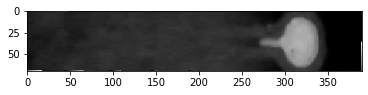

In [65]:
bgr = cv2.imread('sat1.png')
img = cv2.imread('sat1.png',0)
plt.imshow(img,cmap='gray')

(<matplotlib.axes._subplots.AxesSubplot at 0x7f573607a070>,
 <matplotlib.image.AxesImage at 0x7f5736031760>)

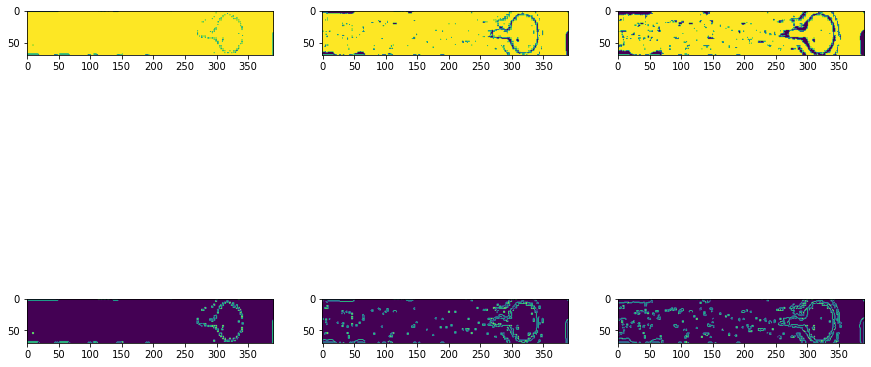

In [152]:
# img = cv2.medianBlur(img,5)
plt.figure(figsize=(15,15))
thresh1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,7)
plt.subplot(3,3,1), plt.imshow(thresh1)
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,13,7)
plt.subplot(3,3,2), plt.imshow(thresh2)
thresh3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,23,7)
plt.subplot(3,3,3), plt.imshow(thresh3)
edged_thresh1 = cv2.Canny(thresh1,50,100)
plt.subplot(3,3,4), plt.imshow(edged_thresh1)
edged_thresh2 = cv2.Canny(thresh2,50,100)
plt.subplot(3,3,5), plt.imshow(edged_thresh2)
edged_thresh3 = cv2.Canny(thresh3,50,100)
plt.subplot(3,3,6), plt.imshow(edged_thresh3)

11.7

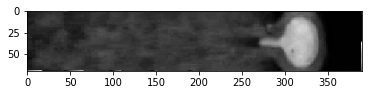

In [144]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1,cmap='gray')

(array([3.8280e+03, 7.4050e+03, 1.3111e+04, 5.8100e+02, 3.5100e+02,
        4.0800e+02, 6.4300e+02, 8.7700e+02, 8.9000e+01, 7.0000e+00]),
 array([  2. ,  21.7,  41.4,  61.1,  80.8, 100.5, 120.2, 139.9, 159.6,
        179.3, 199. ]),
 <a list of 10 Patch objects>)

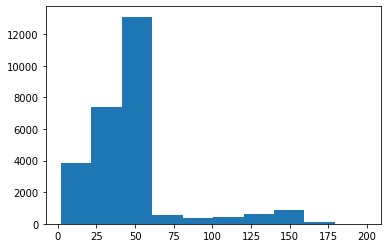

In [150]:
plt.hist(cl1.flatten())

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5736538670>,
 <matplotlib.image.AxesImage at 0x7f57364ee130>)

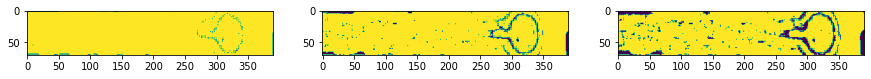

In [147]:
img = cl1
plt.figure(figsize=(15,15))
thresh1 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,3,7)
plt.subplot(3,3,1), plt.imshow(thresh1)
thresh2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,13,7)
plt.subplot(3,3,2), plt.imshow(thresh2)
thresh3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,23,7)
plt.subplot(3,3,3), plt.imshow(thresh3)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f5736376250>,
 <matplotlib.image.AxesImage at 0x7f573631dcd0>)

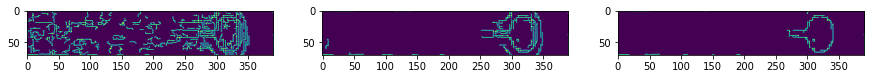

In [149]:
img = cl1
plt.figure(figsize=(15,15))
edged = cv2.Canny(img,25,50)
plt.subplot(1,3,1), plt.imshow(edged)
edged = cv2.Canny(img,50,100)
plt.subplot(1,3,2), plt.imshow(edged)
edged = cv2.Canny(img,100,200)
plt.subplot(1,3,3), plt.imshow(edged)

In [63]:
cnts, hier = cv2.findContours(thresh3, cv2.RETR_EXTERNAL,
                        cv2.CHAIN_APPROX_SIMPLE)

In [159]:
minPerimeterRate = 0.03
maxPerimeterRate = 4.0
minPerimeter = minPerimeterRate*max(img.shape)
maxPerimeter = maxPerimeterRate*max(img.shape)
candidate_cnts = []
for cnt in cnts:
    if cv2.arcLength(cnt,True)>minPerimeter and cv2.arcLength(cnt,True)<minPerimeter:
        candidate_cnts.append(cnt)

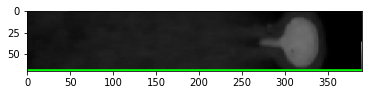

In [160]:
cnt_img = cv2.drawContours(bgr,candidate_cnts,-1,(0,255,0),1)
plt.imshow(cnt_img)

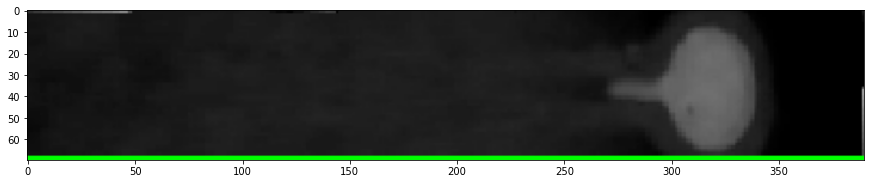

In [131]:
bgr = cv2.imread('sat1.png')
img = cv2.imread('sat1.png',0)
edged = cv2.Canny(img,50,100)
lines = cv2.HoughLines(edged,1,np.pi/180, 10) 
  
# The below for loop runs till r and theta values  
# are in the range of the 2d array 
for r,theta in lines[0]: 
      
    # Stores the value of cos(theta) in a 
    a = np.cos(theta) 
  
    # Stores the value of sin(theta) in b 
    b = np.sin(theta) 
      
    # x0 stores the value rcos(theta) 
    x0 = a*r 
      
    # y0 stores the value rsin(theta) 
    y0 = b*r 
      
    # x1 stores the rounded off value of (rcos(theta)-1000sin(theta)) 
    x1 = int(x0 + 1000*(-b)) 
      
    # y1 stores the rounded off value of (rsin(theta)+1000cos(theta)) 
    y1 = int(y0 + 1000*(a)) 
  
    # x2 stores the rounded off value of (rcos(theta)+1000sin(theta)) 
    x2 = int(x0 - 1000*(-b)) 
      
    # y2 stores the rounded off value of (rsin(theta)-1000cos(theta)) 
    y2 = int(y0 - 1000*(a)) 
      
    # cv2.line draws a line in img from the point(x1,y1) to (x2,y2). 
    # (0,0,255) denotes the colour of the line to be  
    #drawn. In this case, it is red.  
    bgr = cv2.line(bgr,(x1,y1), (x2,y2), (0,255,0),2) 

plt.figure(figsize=(15,15))
plt.imshow(bgr)

In [155]:
cv2.cnts[0]

array([[[314,  69]],

       [[315,  69]]], dtype=int32)

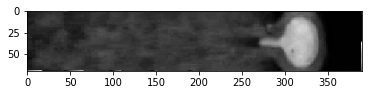

In [132]:
max_val = img.max()

In [137]:
img*np.array(255/max_val)

array([[ 76.98113208,  73.77358491,  73.77358491, ...,   0.        ,
          0.        ,  38.49056604],
       [ 76.98113208,  73.77358491,  73.77358491, ...,   0.        ,
          0.        ,  38.49056604],
       [ 28.86792453,  32.0754717 ,  32.0754717 , ...,   0.        ,
          0.        ,  25.66037736],
       ...,
       [ 28.86792453,  25.66037736,  25.66037736, ...,   0.        ,
          0.        , 115.47169811],
       [ 27.26415094,  25.66037736,  25.66037736, ...,   0.        ,
          0.        , 102.64150943],
       [117.0754717 , 131.50943396, 131.50943396, ...,   0.        ,
          0.        ,  89.81132075]])

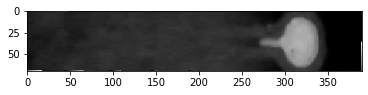

In [139]:
plt.imshow(img,cmap='gray')